In [1]:
from squlearn.feature_map.qcnn_feature_map import qcnn_feature_map
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
import numpy as np

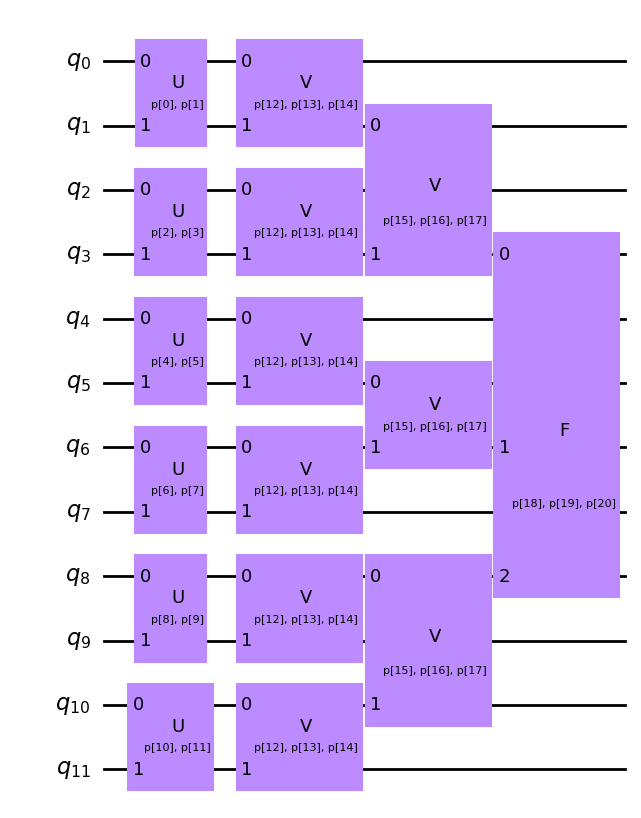

In [2]:
# Tests ohne Vorgabe der Anzahl der Qubits:

qcnn_without_qubits = qcnn_feature_map()


z = ParameterVector("z", 8)
convolution_gate = QuantumCircuit(2)
convolution_gate.crx(z[0],0,1)
convolution_gate.cry(z[1],1,0)
qcnn_without_qubits.convolution(convolution_gate, var_param=True)


y = ParameterVector("y",6)
pooling_gate = QuantumCircuit(2)
pooling_gate.cry(y[0],0,1)
pooling_gate.crz(y[1],1,0)
pooling_gate.cry(y[2],1,0)
qcnn_without_qubits.pooling(pooling_gate,var_param=False) #TODO: var_param funktioniert noch nicht
qcnn_without_qubits.pooling(pooling_gate,var_param=False)



x = ParameterVector("x", 3)
fully_gate = QuantumCircuit(3)
fully_gate.crx(x[0],0,1)
fully_gate.crx(x[2],0,2)
fully_gate.crx(x[1],1,2)
qcnn_without_qubits.fully_connected(fully_gate)

qcnn_param_vec = ParameterVector("p", qcnn_without_qubits.num_parameters)
qcnn_without_qubits.get_circuit([],qcnn_param_vec).draw()

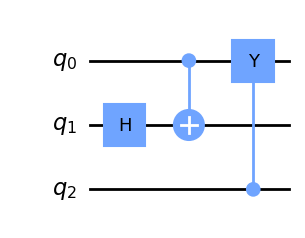

In [3]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

circuit_right_side = QuantumCircuit(3)
circuit_right_side.h(1)
circuit_right_side.cx(0,1)
circuit_right_side.cy(2,0)

circuit_right_side.draw()

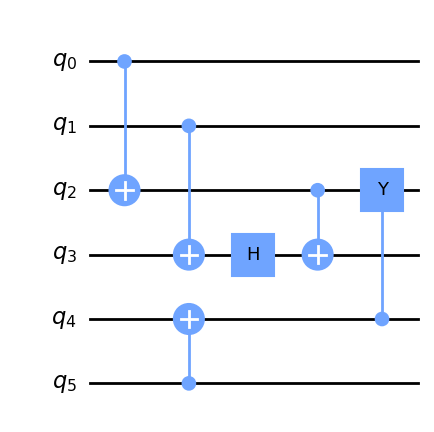

In [4]:
circuit_left_side = QuantumCircuit(6)
circuit_left_side.cx(0,2)
circuit_left_side.cx(1,3)
circuit_left_side.cx(5,4)

QC = circuit_left_side.compose(circuit_right_side,[2,3,4])
QC.draw()